In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
df = pd.read_csv('../PotabilidadeAgua/water_potability.csv')

Y =  df['Potability']
X = df.drop('Potability', axis=1)

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.30, random_state=42)

In [22]:
model = DecisionTreeClassifier()

In [30]:
model = DecisionTreeClassifier(
    criterion = "entropy",
    max_depth = 10,
    min_samples_split = 10
)

In [35]:
parametros = {
    'max_depth': [5, 10, 20, 50, 200],# Quantidade máxima de níveis na árvore
    'min_samples_split': [5, 10],# Número mínimo de amostras necessárias para dividir um nó
    'criterion': ["gini"]
}

dtc = DecisionTreeClassifier()

model = GridSearchCV(
    estimator = dtc,
    param_grid = parametros,
    cv = 5,
    scoring = 'accuracy'
)

Acurácia no treino: 0.6624509376362844
Acurácia no teste: 0.6541200406917599
Matriz confusao


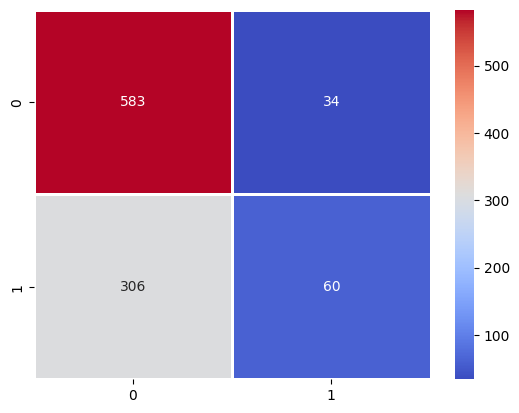

In [36]:
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

accuracy_train =  accuracy_score(Y_train, Y_train_pred)
accuracy_test =  accuracy_score(Y_test, Y_test_pred)

print(f'Acurácia no treino: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')


print('Matriz confusao')

cf_matriz = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cf_matriz, cmap='coolwarm', annot=True, linewidth=1, fmt='d', color='purple')
plt.show()